# Project : Supplemental Kmeans

## Introduction

This is a suplemental part of the project. The idea is to implement k-means clustering for the iris data set.

KMeans is a clustering technique which tries to group features to together based on there distance from a centre point. Initially it starts with 3 random points and moves them around until the best center points are found. 

## References

https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156374951&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936221293&utm_targetid=aud-1832882613722:dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=1007877&utm_content=&accountid=9624585688&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gclid=Cj0KCQjwv_m-BhC4ARIsAIqNeBtcqQxamZLbu_HZzz-KqeYXnvGMhbiqEAkhefWZntcQgx3jKP1Yy2IaAuKgEALw_wcB

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


### Import the necessary libraries to support project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Import Analysis project

In [2]:
import analysis as an

### Load the iris dataset

In [3]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")


Data loaded successfully


Import the kmeans module from sklearn

In [4]:
# Standard Scaler is used to scale the data to a common scale
from sklearn.preprocessing import StandardScaler
# PCA is used to reduce the number of features to 2 for visualization
from sklearn.decomposition import PCA
# Kmeas is used to cluster the data
from sklearn.cluster import KMeans

### Plot a scatter plot of the data  

To visualise the features , see if we can see obvious clustering

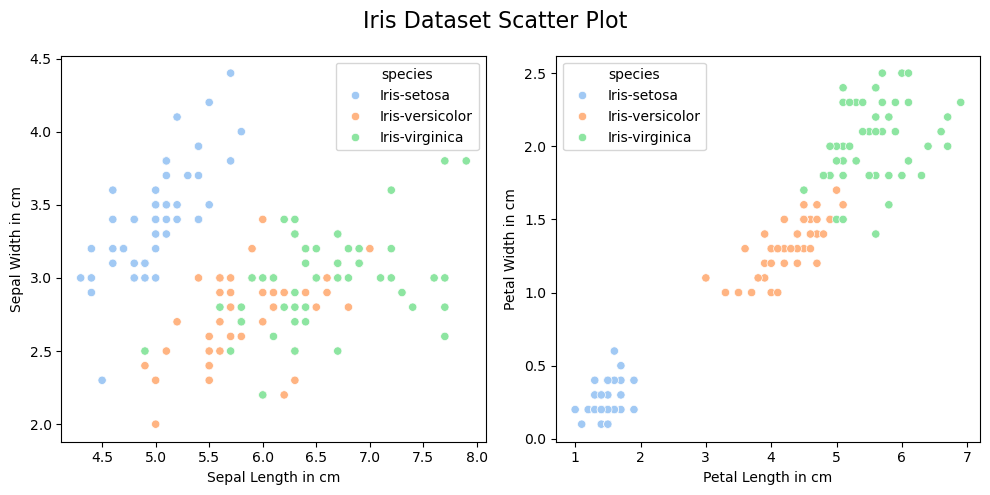

0

In [5]:
an.generate_scatter_plot(an.config, to_console=True)

Do a box Plot of the data

Again to see if we can see obvious clustering . The box plot will show if the data is distributes compactly and if there are any outliers and the potential impact on the clustering

It looks like the petals are a good feature to use for clustering but we will use RPA (random projection analysis) to see if we can find any other features that are good for clustering


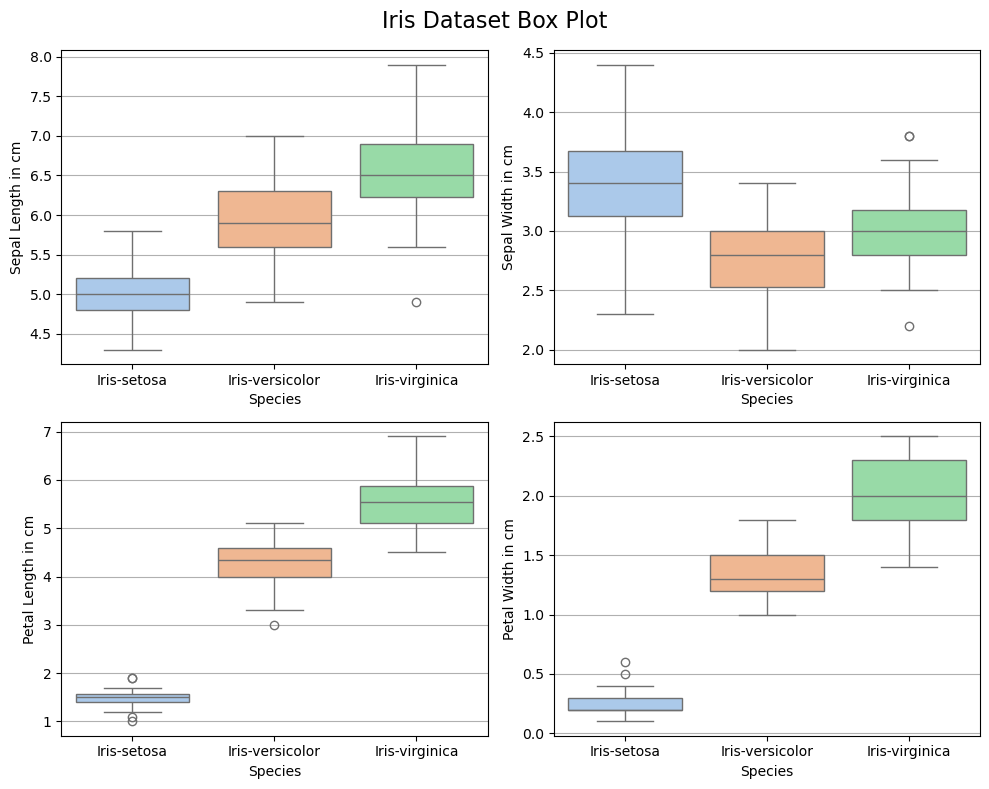

In [6]:
return_code = an.generate_box_plot(an.config, to_console=True)

### Standardize the data for kmeans

That means all features are the same scale. This prevents bias towards features with larger scales.

Bring down to the standard scale ( mean = 0, std = 1)

In [7]:
# Standard 
scaler = StandardScaler()
# Standardize the data
# Fit the StandardScaler to the data only  interested in the features
X = df_iris.iloc[:, :-1].values
scaler.fit(X)
X_scaled = scaler.transform(X)



### Do a scatter plot and box plot of the scaled data

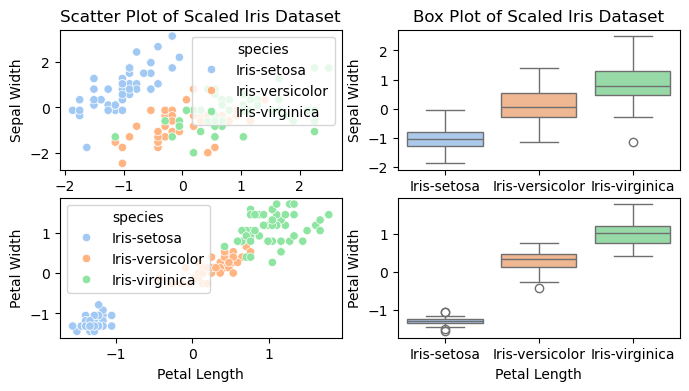

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4))
# scatter plot of the scaled data
ax[0,0].set_title("Scatter Plot of Scaled Iris Dataset")
ax[0,0].set_xlabel("Sepal Length")
ax[0,0].set_ylabel("Sepal Width")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_iris["species"], ax=ax[0,0])
ax[1,0].set_xlabel("Petal Length")
ax[1,0].set_ylabel("Petal Width")
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=df_iris["species"], ax=ax[1,0])


ax[0,1].set_title("Box Plot of Scaled Iris Dataset")
ax[0,1].set_xlabel("Sepal Length")
ax[0,1].set_ylabel("Sepal Width")
sns.boxplot(x="species", y=X_scaled[:, 0], data=df_iris,hue='species', ax=ax[0,1])
ax[1,1].set_xlabel("Petal Length")
ax[1,1].set_ylabel("Petal Width")
sns.boxplot(x="species", y=X_scaled[:, 2], data=df_iris,hue='species', ax=ax[1,1])
plt.show()



Now apply RPA to reduce the data to 2D

In [9]:
RPA = PCA(n_components=2)
X_rpa = RPA.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {RPA.explained_variance_ratio_}")
df_rpa = pd.DataFrame(data=X_rpa, columns=["PC1", "PC2"])
# Add the species column to the dataframe
# the order is preserved so we can just add the species column
df_rpa["species"] = df_iris["species"]


Explained Variance Ratio: [0.72770452 0.23030523]


Plot the data in 2D   

A scatter and box plot of the data in 2D. This will show if the data is now more compact and if there are any outliers and the potential impact on the clustering

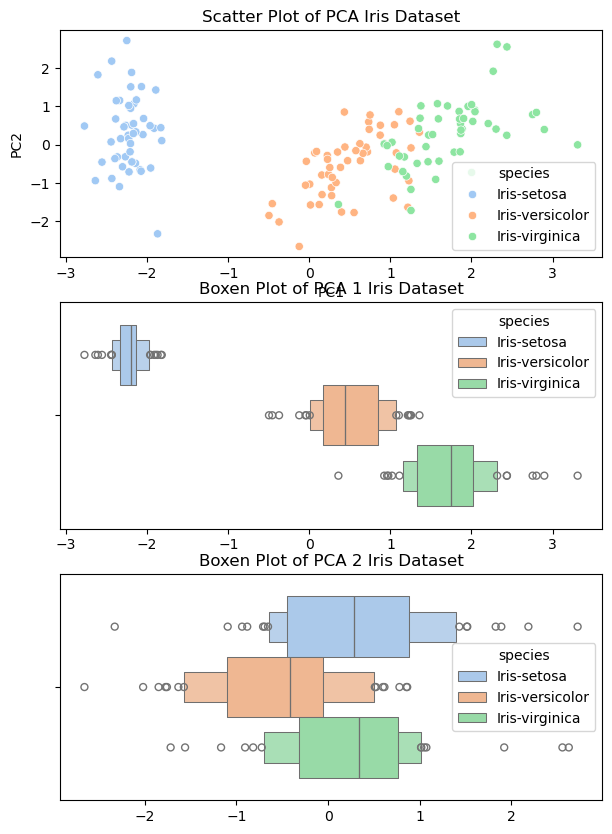

In [10]:
fig, ax = plt.subplots(3, figsize=(7, 10))
ax[0].set_title("Scatter Plot of PCA Iris Dataset")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[0])
# Boxen plot of the PCA data
ax[1].set_title("Boxen Plot of PCA 1 Iris Dataset")
sns.boxenplot(x=X_rpa[:, 0], hue=df_iris["species"], ax=ax[1])
# Boxen plot of the PCA data
ax[2].set_title("Boxen Plot of PCA 2 Iris Dataset")
sns.boxenplot(x=X_rpa[:, 1], hue=df_iris["species"], ax=ax[2])
plt.show()

Now apply kmeans to the data


In [11]:
kmeans = KMeans(n_clusters=3, random_state=57, n_init='auto')
# n_init is the number of times the K-means algorithm will run with different centroid seeds
# the best result is selected

kmeans.fit(X_rpa)
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print(f"Inertia: {kmeans.inertia_}")
print(f"Number of Iterations: {kmeans.n_iter_}")
print(f"Features: {kmeans.n_features_in_}")
#print(f"Labels: {kmeans.labels_}")
# Add labels to dataframe , these are the cluster numbers
# the kmeans returns the cluster for species in the order of the species in the dataframe
# so we can just add the labels to the dataframe


Cluster Centers: [[-2.22019328  0.29222482]
 [ 0.61198392 -0.79925263]
 [ 1.71890108  0.65217008]]
Inertia: 116.24247259315808
Number of Iterations: 7
Features: 2


c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plot the results of the kmean clustering

Use a scatter splot with the clusters number/species labels with colour , and the species by symbol. In adition add kde plot to show the density of the data points.

[seaborn kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


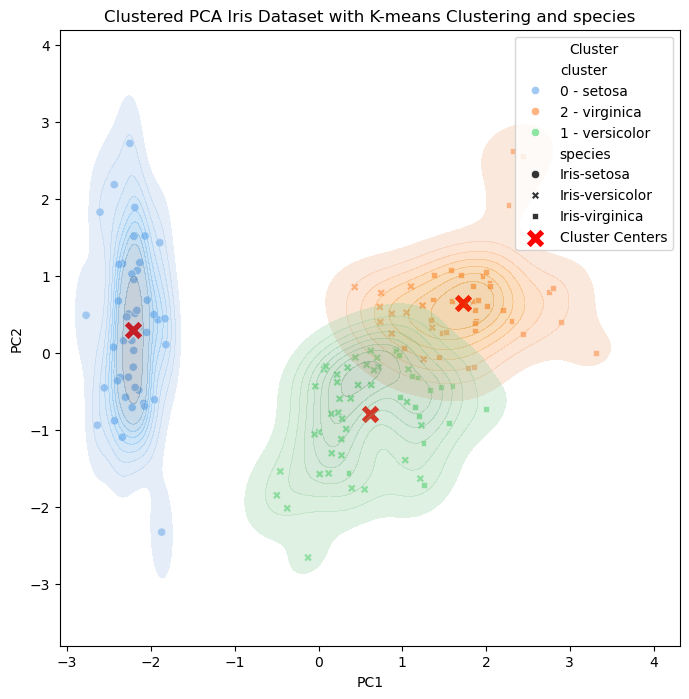

In [12]:
df_rpa["cluster"] = kmeans.labels_
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.set_title("Clustered PCA Iris Dataset with K-means Clustering and species")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
# the cluster numbers are 0,1,2 , so we can map them to the species names
cluster_map = {0: '0 - setosa', 1: '1 - versicolor', 2: '2 - virginica'}
df_rpa['cluster'] = df_rpa['cluster'].replace(cluster_map)
# plot the clusters with different colors ,and each species with different markers
# making it easier to see the clusters , and incorrectly identified species
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_rpa["cluster"],style=df_rpa['species'], ax=ax)
# the kmeans also returns the cluster centers , so we can put a big red dot on the center
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', ax=ax,s=200, marker='X', label='Cluster Centers')
# shade the area around the cluster centers - used this prompt to show the area around the cluster centers
# 
sns.kdeplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_rpa["cluster"], fill=True, ax=ax, alpha=0.3)
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Determine how the clusters identified the species based on the species name

A heatmap was used to display the count of species assigned to each cluster. The heatmap shows in graphical format the accurracy of the clustering. The setosa was the most accurate with 100% hit rate. The verginica was the worst with a hit rate of 34/50. 

Text(20.722222222222214, 0.5, 'Species')

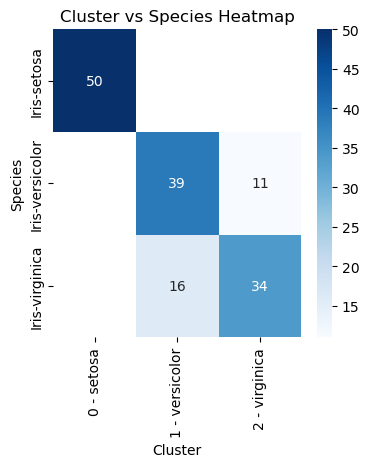

In [13]:
# Get the value counts per cluster , this how kmeans assigned clusters to speciesds
df_rpa[['species', 'cluster']].value_counts()
# plot as a heatmap - github suggested heatmap , i wanted to plot cluster vs specie
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(df_rpa[['species', 'cluster']].value_counts().unstack(), annot=True,  cmap='Blues', ax=ax)
ax.set_title("Cluster vs Species Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Species")


Apply the elbow method to find the best number of clusters  

Look for th kink (inflection point) in the elbow plot , this indicates the best number of clusters

c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Elbow Method')

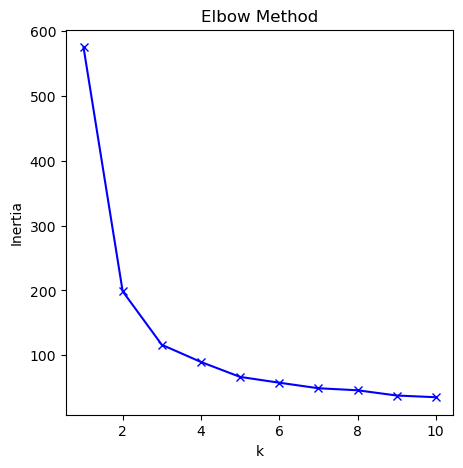

In [14]:
K = range(1, 11) # number of clusters
inertia = [] # list to store the inertia values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=57, n_init='auto');
    kmeans.fit(X_rpa);
    inertia.append(kmeans.inertia_);
# Plot the inertia values
plt.figure(figsize=(5, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')